## 第二题

1234 都在下面代码中给出。可以发现，牛顿法只能解第二个方程，而牛顿下山法damped newton对两个方程都能求解。对于第二个方程，牛顿下山法的轮次更少，但是每个轮次内函数可能需要多次求值。

需要注意牛顿下山法的迭代次数与系数序列的选取相关。这个结论可能不具有普遍性。

## 第三题

下面已经给出了代码实现，以及作图。注意scipy的brentq和fzerotx的过程基本一致。


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import fsolve, root, brentq

In [2]:
def f1(x):
    return x**3 - 2 * x + 2
def f1_prime(x):
    return 3 * x**2 - 2
def f2(x):
    return - x**3 + 5 * x
def f2_prime(x):
    return -3 * x**2 + 5

In [3]:
def newton(f, x0, fprime, tol_f, tol_x, max_steps=1000) -> tuple[float, bool, list[float]]:
    x = x0
    all_x = [x0]
    for _ in range(max_steps):
        x2 = x - f(x) / fprime(x)
        all_x.append(x2)
        if abs(f(x)) < tol_f and abs(x - x2) < tol_x:
            return x2, True, all_x
        x = x2
    return x, False, all_x
def damped_newton(f, x0, fprime, tol_f, tol_x, max_steps=1000) -> tuple[float, bool, list[tuple[float, float]]]:
    x = x0
    all_x = [x0]
    for _ in range(max_steps):
        for damping in 1.5 ** -np.arange(0, 10, dtype=float):
            x2 = x - damping * f(x) / fprime(x)
            if abs(f(x2)) < abs(f(x)):
                all_x.append((x2, damping))
                break
        else:
            return x, False, all_x
        if abs(f(x)) < tol_f and abs(x - x2) < tol_x:
            return x2, True, all_x
        x = x2
    return x, False, all_x

In [4]:
x1 = 0.
x2 = 1.35
x, success, steps = newton(f1, x1, f1_prime, 1e-8, 1e-8)
print(f"{'FAIL' if not success else 'GOOD'} Newton on f1 gives {x=:.4f} in {len(steps)} steps")
x, success, steps = damped_newton(f1, x1, f1_prime, 1e-8, 1e-8)
print(f"{'FAIL' if not success else 'GOOD'} Damped Newton on f1 gives {x=:.4f} in {len(steps)} steps")
x, success, steps = newton(f2, x2, f2_prime, 1e-8, 1e-8)
print(f"{'FAIL' if not success else 'GOOD'} Newton on f2 gives {x=:.4f} in {len(steps)} steps")
x, success, steps = damped_newton(f2, x2, f2_prime, 1e-8, 1e-8)
print(f"{'FAIL' if not success else 'GOOD'} Damped Newton on f2 gives {x=:.4f} in {len(steps)} steps")

FAIL Newton on f1 gives x=0.0000 in 1001 steps
GOOD Damped Newton on f1 gives x=-1.7693 in 9 steps
GOOD Newton on f2 gives x=2.2361 in 11 steps
GOOD Damped Newton on f2 gives x=2.2361 in 7 steps


In [5]:
print(f"brentq gives {brentq(f1, x1 - 100, x1 + 100)} for f1")
print(f"fsolve gives {fsolve(f2, x2, fprime=f2_prime)} for f2")

brentq gives -1.769292354238631 for f1
fsolve gives [2.23606798] for f2


Answer for the first 10 roots: [ 2.40482556  5.52007811  8.65372791 11.79153444 14.93091771 18.07106397
 21.21163663 24.35247153 27.49347913 30.63460647]
Solved first 10 roots are: [2.4048255576957724, 5.520078110286316, 8.653727912911013, 11.791534439014281, 14.930917708487787, 18.071063967910593, 21.21163662987926, 24.352471530749302, 27.493479132040257, 30.634606468431976, 33.77582021357357, 36.91709835366404, 40.05842576462823, 43.19979171317673, 46.34118837166181, 49.482609897397815]


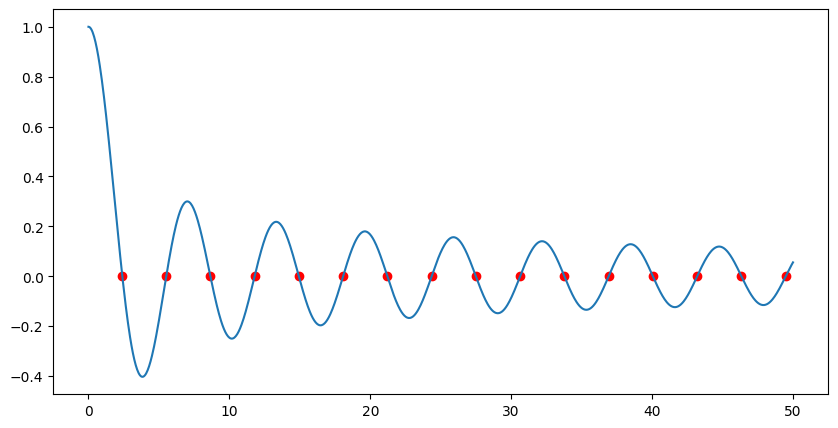

In [6]:
from scipy.special import j0
from scipy.special import jn_zeros
print("Answer for the first 10 roots:", jn_zeros(0, 10))
roots = []
for i in range(0, 50, 2):
    if j0(i) * j0(i+2) < 0:
        roots.append(brentq(j0, i, i+2))
print("Solved first 10 roots are:", roots)
fig = plt.figure(figsize=(10, 5))
x = np.linspace(0, 50, 1000)
plt.plot(x, j0(x))
plt.scatter(roots, [0] * len(roots), color='red')